# 1. 라이브러리 임포트

In [8]:
### import
import pandas as pd
import numpy as np

# 데이터 프레임 row 제한
pd.set_option('display.max_columns', 60)

# matplotlib 화면 표시
import matplotlib.pyplot as plt
%matplotlib inline

# 폰트사이즈 설정
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn 화면 표시
import seaborn as sns
sns.set(font_scale = 2)

# 데이터 분리를 통한 훈련데이터와 테스터 데이터 학습
from sklearn.model_selection import train_test_split

# 2. 데이터 정제

In [9]:
# 훈련 데이터 불러오기
credit = pd.read_csv('dataset/credit_train.csv')

# 데이터 확인
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [10]:
credit.shape

(100514, 19)

In [11]:
# 데이터 정보 확인
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [12]:
# 데이터 성분 분석
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [13]:
# 'Loan ID', 'Customer ID' 정보 삭제 
credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

### 데이터 결측치 처리

In [14]:
# 결측치 분석 함수 만들기

def missing_values_table(df):
    
    # 총 결측치 
    mis_val = df.isnull().sum()
    
    # 결측치의 퍼센트 확인
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # 결과값으로 테이블 만들기
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # 칼럼명 재지정
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # 결측치 내림차순으로 테이블 정렬
    mis_val_table_ren_columns = mis_val_table_ren_columns[
           mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
       '% of Total Values', ascending=False).round(1)
        
    # 정보 요약
    print ("선택한 데이터는" + str(df.shape[1]) + " 개의 컬럼이 존재합니다.\n"      
            "결측치가 있는 칼럼은 " + str(mis_val_table_ren_columns.shape[0]) +
              " 개입니다.")
    
    # 데이터프레임 리턴
    return mis_val_table_ren_columns
    
    

In [15]:
# 데이터 결측치 분석함수에 데이터 집어 넣기
missing_values_table(credit)

선택한 데이터는17 개의 컬럼이 존재합니다.
결측치가 있는 칼럼은 17 개입니다.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


#### * 50% 이상 데이터가 없는 'Months since last delinquent' 는 상관성에 무의미 함으로 판단하고 분석 데이블에서 제외 할 것

In [16]:
credit.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [17]:
# 514개의 결측치가 발견된 곳 확인
credit[credit['Years of Credit History'].isnull()]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### * 마지막 514 rows 가 모두 결측치인것을 확인

In [18]:
credit.drop(credit.tail(514).index, inplace=True) 
# 마지막 514 row 삭제
missing_values_table(credit)

선택한 데이터는16 개의 컬럼이 존재합니다.
결측치가 있는 칼럼은 6 개입니다.


,Missing Values,% of Total Values
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


#### * 'Maximum Open Credit, Tax Liens, Bankruptcies' 는 매우 적은 결측치를 갖기 때문에 삭제 한다

In [19]:
credit.drop(credit['Maximum Open Credit'][credit['Maximum Open Credit'].isnull() == True].index, inplace=True)
credit.drop(credit['Tax Liens'][credit['Tax Liens'].isnull() == True].index, inplace=True)
credit.drop(credit['Bankruptcies'][credit['Bankruptcies'].isnull() == True].index, inplace=True)

In [20]:
missing_values_table(credit)

선택한 데이터는16 개의 컬럼이 존재합니다.
결측치가 있는 칼럼은 3 개입니다.


,Missing Values,% of Total Values
Credit Score,19111,19.2
Annual Income,19111,19.2
Years in current job,4222,4.2


#### * 평균값으로 나머지 결측치값을 대체 하기

In [21]:
# inplace=True 는 변수값을 직접 변경한다는 뜻이다.
credit.fillna(credit.mean(), inplace=True)
missing_values_table(credit)

선택한 데이터는16 개의 컬럼이 존재합니다.
결측치가 있는 칼럼은 1 개입니다.


,Missing Values,% of Total Values
Years in current job,4222,4.2


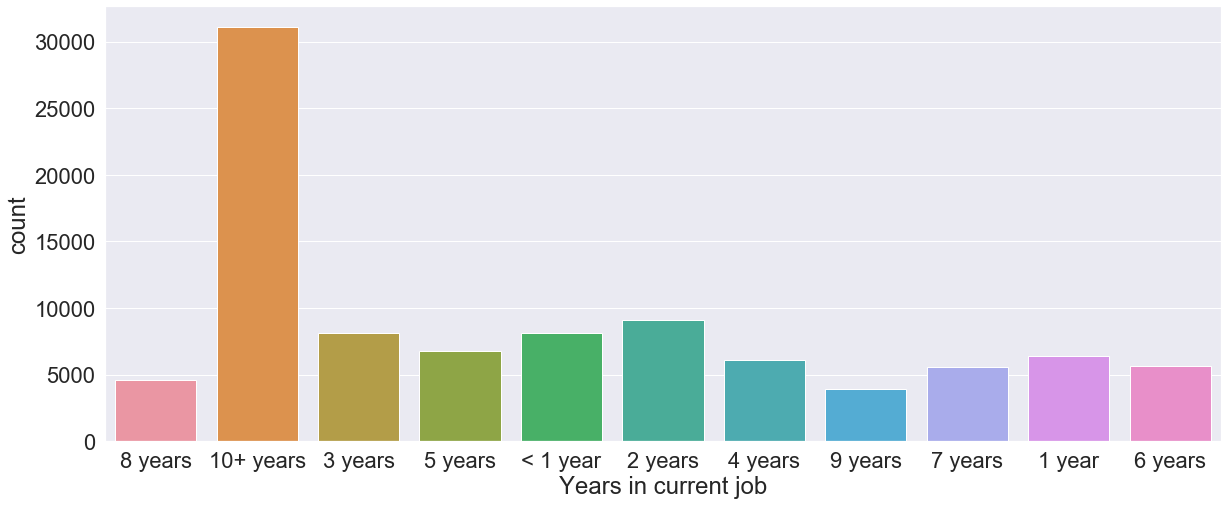

In [22]:
# "Years in current job" 는 범주형 데이터로 평균값을 찾을수 없다.
# 따라서 가장 양이 많은 데이터를 찾아서 대체 할 것
plt.figure(figsize=(20,8))
sns.countplot(credit['Years in current job'])

In [23]:
credit.fillna('10+ years', inplace=True)
# 가장 많은 데이터인 '10+ years' 로 결측치를 대체하겠다.
missing_values_table(credit)

선택한 데이터는16 개의 컬럼이 존재합니다.
결측치가 있는 칼럼은 0 개입니다.


,Missing Values,% of Total Values


C:\ProgramData\Anaconda3\envs\juno\lib\site-packages\seaborn\axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


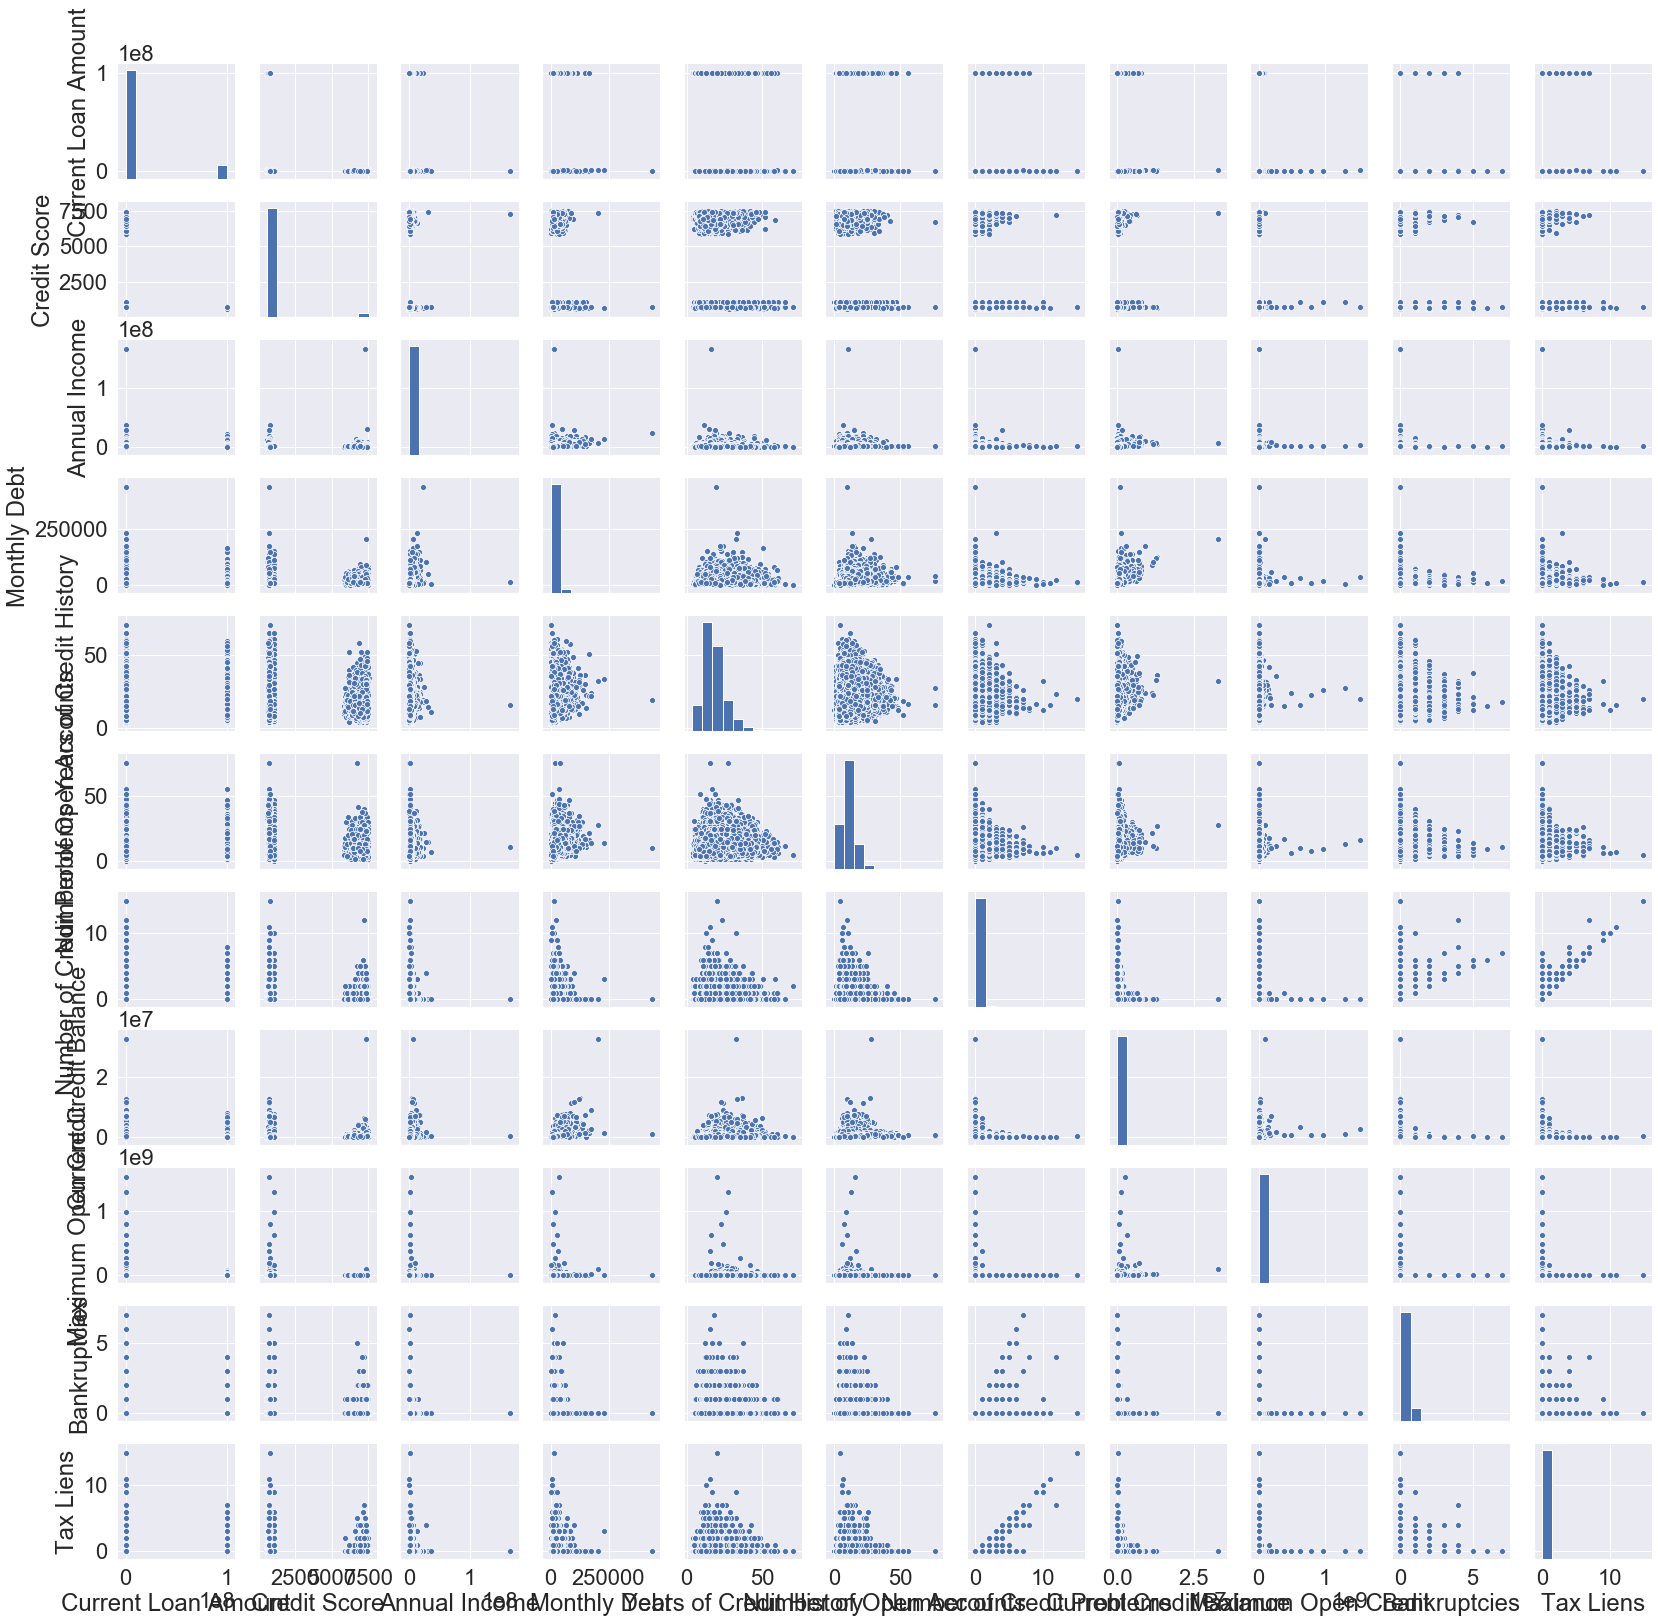

In [17]:
# 상관 관계 분석
sns.pairplot(credit)

In [24]:
# 모든 상관관계 찾기 및 정렬
correlations_data = credit.corr()['Credit Score'].sort_values(ascending=False)

# 상관관계 출력
print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Number of Open Accounts      0.005726
Tax Liens                    0.004765
Current Credit Balance       0.000168
Monthly Debt                -0.001457
Maximum Open Credit         -0.002073
Number of Credit Problems   -0.002785
Bankruptcies                -0.006257
Years of Credit History     -0.008652
Annual Income               -0.016989
Current Loan Amount         -0.095108
Name: Credit Score, dtype: float64>


In [25]:
credit.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [26]:
credit.select_dtypes(include = "object")

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
1,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation
4,Fully Paid,Short Term,5 years,Rent,Debt Consolidation
...,...,...,...,...,...
99995,Fully Paid,Short Term,7 years,Own Home,other
99996,Fully Paid,Short Term,1 year,Rent,Debt Consolidation
99997,Fully Paid,Short Term,6 years,Rent,Debt Consolidation
99998,Fully Paid,Short Term,9 years,Rent,Debt Consolidation


In [27]:
# 범주형 데이터 확인
categorical_subset = credit[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# one hot encoding(더미함수 사용)
categorical_subset = pd.get_dummies(categorical_subset)

credit.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
credit = pd.concat([credit, categorical_subset], axis = 1)

In [28]:
credit

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,Fully Paid,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Fully Paid,262328.0,1076.275101,1.378339e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Fully Paid,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Fully Paid,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Fully Paid,176220.0,1076.275101,1.378339e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070.0,725.000000,4.754370e+05,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
99996,Fully Paid,99999999.0,732.000000,1.289416e+06,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
99997,Fully Paid,103136.0,742.000000,1.150545e+06,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
99998,Fully Paid,530332.0,746.000000,1.717524e+06,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
credit.isnull().sum()

Loan Status                       0
Current Loan Amount               0
Credit Score                      0
Annual Income                     0
Monthly Debt                      0
Years of Credit History           0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      0
Tax Liens                         0
Term_Long Term                    0
Term_Short Term                   0
Years in current job_1 year       0
Years in current job_10+ years    0
Years in current job_2 years      0
Years in current job_3 years      0
Years in current job_4 years      0
Years in current job_5 years      0
Years in current job_6 years      0
Years in current job_7 years      0
Years in current job_8 years      0
Years in current job_9 years      0
Years in current job_< 1 year     0
Home Ownership_HaveMortgage       0
Home Ownership_Home Mortgage      0
Home Ownership_Own Home     

In [30]:
#temp = credit
#temp.to_csv("dataset/credit_temp.csv",index=False)
temp = pd.read_csv("dataset/credit_temp.csv")
#del temp["Loan Status"]
temp

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
#temp = temp[0:1]
#temp
#temp.to_csv("dataset/credit_temp.csv",index=False)

In [32]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 44 columns):
Current Loan Amount               1 non-null int64
Credit Score                      1 non-null int64
Annual Income                     1 non-null int64
Monthly Debt                      1 non-null int64
Years of Credit History           1 non-null int64
Number of Open Accounts           1 non-null int64
Number of Credit Problems         1 non-null int64
Current Credit Balance            1 non-null int64
Maximum Open Credit               1 non-null int64
Bankruptcies                      1 non-null int64
Tax Liens                         1 non-null int64
Term_Long Term                    1 non-null int64
Term_Short Term                   1 non-null int64
Years in current job_1 year       1 non-null int64
Years in current job_10+ years    1 non-null int64
Years in current job_2 years      1 non-null int64
Years in current job_3 years      1 non-null int64
Years in current job_4 years    

In [33]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 45 columns):
Loan Status                       99794 non-null object
Current Loan Amount               99794 non-null float64
Credit Score                      99794 non-null float64
Annual Income                     99794 non-null float64
Monthly Debt                      99794 non-null float64
Years of Credit History           99794 non-null float64
Number of Open Accounts           99794 non-null float64
Number of Credit Problems         99794 non-null float64
Current Credit Balance            99794 non-null float64
Maximum Open Credit               99794 non-null float64
Bankruptcies                      99794 non-null float64
Tax Liens                         99794 non-null float64
Term_Long Term                    99794 non-null uint8
Term_Short Term                   99794 non-null uint8
Years in current job_1 year       99794 non-null uint8
Years in current job_10+ years    99794 non

# 3. 데이터 스케일링

In [34]:
# 학습데이터 분리
features = credit.drop(columns='Loan Status')
targets = pd.DataFrame(credit['Loan Status'])

# 학습데이터와 테스트데이터는 8:2 비율
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79835, 44)
(19959, 44)
(79835, 1)
(19959, 1)


### 데이터 분석 전처리

#### *  스케일링(Scailing)
스케일링을 통해 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지 하고, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상 시킨다.

https://mkjjo.github.io/python/2019/01/10/scaler.html 링크 참고

In [35]:
# 스케일링
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 독립변수들 one hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

C:\ProgramData\Anaconda3\envs\juno\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [37]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [38]:
X_train

array([[-0.36102332, -0.29098075,  0.52858264, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.35523419, -0.26165702,  0.48407171, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.357882  , -0.26165702, -0.35823972, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       ...,
       [-0.36101847, -0.27744672,  0.47657733, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.36255586, -0.25789757, -0.77726096, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.35567642, -0.2556419 ,  0.1256506 , ..., -0.05147771,
        -0.03206516, -0.0343339 ]])

In [39]:
X_test

array([[-3.63944227e-01, -2.69927815e-01, -7.23642936e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.62381883e-01, -1.29610336e-03,  4.31089330e-04, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.58970926e-01, -2.93236417e-01,  2.06722719e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       ...,
       [-3.62962737e-01, -2.57145679e-01,  1.03184451e+00, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.59089453e-01, -2.81958061e-01,  1.27927374e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.63813916e-01, -2.48874885e-01, -4.02692887e-02, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02]])

# 4. 데이터 모델 생성

In [40]:
# 평가 모델 만들기

# MAE계산을 위한 함수 선언
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# 모델을 가져 와서 모델을 학습시키고 테스트 세트에서 모델을 평가.
def fit_and_evaluate(model):
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측 및 평가 모델 
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # performance metric 출력
    return model_cross

# Sklearn 활용한 예측 : https://machinelearningmastery.com/make-predictions-scikit-learn/

## Logistic Regression

In [41]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance on the test set: Cross Validation Score = 0.8197


## Random Forest Classification

In [42]:
# # 랜덤 포레스트(분류)
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.8007


## Gradiente Boosting Classification

In [43]:
# # 그래디언드 부스팅(분류)
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.8197


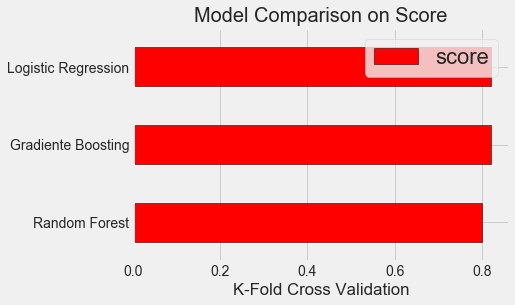

In [44]:
# 최적의 모델 값 선정을 위한 그래프 비교

plt.style.use('fivethirtyeight')
figsize=(8, 6)

# 결과값 저장용 데이터프레임
model_comparison = pd.DataFrame({'model': ['Logistic Regression',
                                           'Random Forest',
                                            'Gradiente Boosting'],
                                 'score': [logr_cross, random_cross, gb_cross]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);

# 5. 데이터 모델 최적화

In [45]:
# 모델 최적화

# 최적화를 위한 손실 함수
loss = ['ls', 'lad', 'huber']

# 부스팅에 사용할 트리 수 성정
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree(최대깊이)
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf(최소잎사귀노드)
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node(최소분리노드)
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# 검색을 위한 하이퍼 파라미터 정의
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

### RandomizedSearchCV를 사용한 최적화

In [47]:
# 하이퍼 파라미터 튜닝 사용을 위한 모델 생성
model = XGBClassifier(random_state = 42)

# 4-fold cross validation
## RandomizedSearchCV 는 GridSearch처럼 모든 것을 다 실행시키지 않고 랜덤하게 실행시킨다.
# 매개 변수 설정만큼 샘플링이 되는데 이때 설정은 n_iter로 설정

# 링크 참고 : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [40]:
# 트레이닝 데이터에 학습
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 49.0min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=42, reg_alpha=0,
                                           reg_lambda=1, s...
                   iid='deprecated', n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_d

In [41]:
# RandomCV 결과와 테스트 성능을 저장 및 출력
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,27.529217,0.106523,0.175739,2.310411e-02,100,2,6,auto,5,ls,"{'n_estimators': 100, 'min_samples_split': 2, ...",-0.180670,-0.177915,-0.180470,-0.179978,-0.179758,0.001094,1,-0.177734,-0.178920,-0.178552,-0.178115,-0.178330,0.000447
17,75.509489,0.224310,0.300713,1.295170e-02,500,6,8,None,2,lad,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.180971,-0.178015,-0.180821,-0.179677,-0.179871,0.001183,2,-0.178335,-0.179438,-0.178736,-0.178733,-0.178810,0.000397
23,20.112431,0.122256,0.085917,1.352855e-02,100,10,4,sqrt,3,huber,"{'n_estimators': 100, 'min_samples_split': 10,...",-0.181322,-0.178666,-0.180971,-0.180228,-0.180297,0.001021,3,-0.179738,-0.180640,-0.179939,-0.180169,-0.180122,0.000336
14,15.118600,0.095468,0.078106,6.419617e-07,100,6,2,sqrt,2,ls,"{'n_estimators': 100, 'min_samples_split': 6, ...",-0.181422,-0.178716,-0.180871,-0.180279,-0.180322,0.001011,4,-0.179905,-0.180874,-0.180122,-0.180236,-0.180284,0.000361
7,114.556934,0.319117,0.497941,6.169942e-02,500,4,6,auto,3,ls,"{'n_estimators': 500, 'min_samples_split': 4, ...",-0.181272,-0.178366,-0.180670,-0.181080,-0.180347,0.001164,5,-0.175730,-0.176331,-0.175914,-0.175877,-0.175963,0.000223
9,96.646640,0.202256,0.393865,2.464941e-02,500,4,2,auto,3,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-0.181272,-0.178366,-0.180670,-0.181080,-0.180347,0.001164,5,-0.175730,-0.176331,-0.175914,-0.175877,-0.175963,0.000223
21,146.410718,0.397405,0.652189,1.295194e-02,500,6,4,log2,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.180821,-0.178967,-0.181272,-0.180629,-0.180422,0.000872,7,-0.161050,-0.160966,-0.161567,-0.160963,-0.161137,0.000251
12,154.245222,0.611418,0.655012,9.575699e-03,500,6,6,None,5,lad,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.180821,-0.178967,-0.181272,-0.180629,-0.180422,0.000872,7,-0.161050,-0.160966,-0.161567,-0.160963,-0.161137,0.000251
3,159.526896,0.418885,0.619480,8.434364e-03,500,6,8,None,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.180821,-0.178967,-0.181272,-0.180629,-0.180422,0.000872,7,-0.161050,-0.160966,-0.161567,-0.160963,-0.161137,0.000251
19,217.116637,0.321543,0.824024,1.295228e-02,1100,6,2,auto,3,lad,"{'n_estimators': 1100, 'min_samples_split': 6,...",-0.181071,-0.178867,-0.180771,-0.181932,-0.180660,0.001120,10,-0.169283,-0.169417,-0.169250,-0.169497,-0.169362,0.000100


In [42]:
random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, loss='ls', max_delta_step=0, max_depth=5,
              max_features='auto', min_child_weight=1, min_samples_leaf=6,
              min_samples_split=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
# 하이퍼 파라미터에 의한 최상의 그래디언트 부스트 모델

# loss = ls
# n_estimators = 100
# max_depth = 5
# min_samples_leaf = 6
# min_samples_split = 2
# max_features = auto 

### grid_search 사용한 최적화

In [48]:
# 평가를 위한 트리의 범주를 정의
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = XGBClassifier(loss = 'ls', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [49]:
# 그리지 서치 학습
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.6min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, loss='ls',
                                     max_delta_step=0, max_depth=5,
                                     max_features='auto', min_child_weight=1,
                                     min_samples_leaf=6, min_samples_split=2,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_est

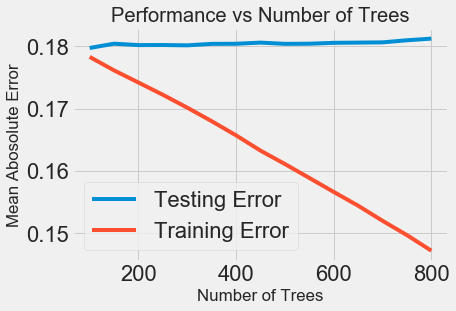

In [50]:
# GridSearch의 결과값을 데이터 프레임으로 저장
results = pd.DataFrame(grid_search.cv_results_)

# 학습과 테스트에서의 에러 vs number of trees
figsize=(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [51]:
results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,31.682512,0.078964,0.300203,0.055137,100,{'n_estimators': 100},-0.180670,-0.177915,-0.180470,-0.179978,-0.179758,0.001094,1,-0.177734,-0.178920,-0.178552,-0.178115,-0.178330,0.000447
4,96.613150,0.515281,0.360066,0.014886,300,{'n_estimators': 300},-0.180219,-0.179167,-0.180670,-0.180679,-0.180184,0.000616,2,-0.169667,-0.170352,-0.170970,-0.169731,-0.170180,0.000529
2,64.554656,0.358604,0.415643,0.057168,200,{'n_estimators': 200},-0.180119,-0.178616,-0.181021,-0.181130,-0.180222,0.001007,3,-0.173625,-0.174694,-0.174661,-0.173873,-0.174213,0.000473
3,80.553436,0.477586,0.367030,0.077663,250,{'n_estimators': 250},-0.180069,-0.178867,-0.181171,-0.180830,-0.180234,0.000885,4,-0.171638,-0.172657,-0.172774,-0.171919,-0.172247,0.000481
8,159.824633,0.211902,0.749096,0.126155,500,{'n_estimators': 500},-0.180821,-0.178967,-0.181272,-0.180629,-0.180422,0.000872,5,-0.161050,-0.160966,-0.161567,-0.160963,-0.161137,0.000251


# 6. 데이터에 대한 최종 모델 평가 

In [52]:
# Default model
default_model = XGBClassifier(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, loss='ls', max_delta_step=0, max_depth=5,
              max_features='auto', min_child_weight=1, min_samples_leaf=6,
              min_samples_split=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [55]:
from numpy import loadtxt
import xgboost
import pickle
from sklearn import model_selection
from sklearn.metrics import accuracy_score
pickle.dump(final_model, open("pima.pickle.dat", "wb"))

### 속도측정

In [71]:
%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)

11.9 s ± 139 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [72]:
%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

17.4 s ± 107 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [73]:
final_pred = final_model.predict(X_test)
final_pred

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

# MAE를 계산하는 함수
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 0.1829.
Final model performance on the test set:   MAE = 0.1820.


In [58]:
# 최종 모델은 기본 모델보다 성능이 약 1 % 미만이며 실행 시간이 크게 증가
# 여기서, 상대적인 차이가 매우 작고 훈련 시간의 절대 크기는 중요하지 않기 때문에, 런타임의 증가는 방해가되지 않음
# 다른 상황에서는 잔액이 같지 않을 수 있으므로 최적화 대상과 작업해야 할 제한 사항을 고려해야함

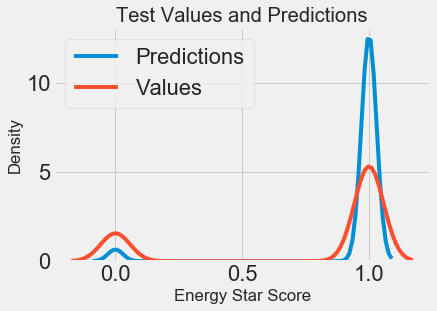

In [75]:
# 예측값을 시각적으로 표시

figsize=(8, 8)

# 최종 예측과 테스트 값의 정도를 표시
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

# 분포는 거의 같은 것을 확인 할 수 있다.

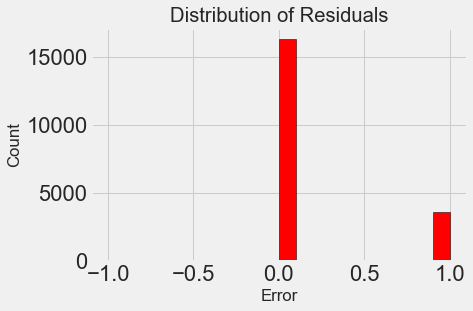

In [76]:
# 잔차의 히스토그램 확인.
figsize = (6, 6)

# 잔차 계산 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

# 잔차는 0 값에 거의 다 수렴한다. 일부 1에 수렴하는 이상치가 존재

#### * 오차와 잔차는 같은 개념이지만 모집단의 간의 차이값 = 오차, 표본의 값간의 차이 = 잔차 로 잔차가 통계적 개념의 차이라고 할수 있다.

In [77]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, loss='ls', max_delta_step=0, max_depth=5,
              max_features='auto', min_child_weight=1, min_samples_leaf=6,
              min_samples_split=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [136]:
y_pred = model.predict(X_test)

y_pred = list(map(lambda x: 'Fully Paid' if x==1 else 'Charged Off' ,y_pred))
y_pred = np.array(y_pred)
y_pred[:]

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype='<U11')

## 중요도 분석
종속변수를 가장 잘 예측하는 독립변수로 사용 될 수 있다.

중요도를 데이터 프레임에 저장하여 분석하고 시각화

In [137]:
features

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,262328.0,1076.275101,1.378339e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,176220.0,1076.275101,1.378339e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,725.000000,4.754370e+05,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
99996,99999999.0,732.000000,1.289416e+06,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
99997,103136.0,742.000000,1.150545e+06,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
99998,530332.0,746.000000,1.717524e+06,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [138]:
X_test

array([[-3.63944227e-01, -2.69927815e-01, -7.23642936e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.62381883e-01, -1.29610336e-03,  4.31089330e-04, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.58970926e-01, -2.93236417e-01,  2.06722719e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       ...,
       [-3.62962737e-01, -2.57145679e-01,  1.03184451e+00, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.59089453e-01, -2.81958061e-01,  1.27927374e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.63813916e-01, -2.48874885e-01, -4.02692887e-02, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02]])

In [139]:
# 데이터 프레임에서 중요도를 추출
feature_results = pd.DataFrame({'feature': list(features.columns), 
                                'importance': model.feature_importances_})

# 중요도 상위 10개를 출력
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,Credit Score,0.302631
1,Current Loan Amount,0.133885
2,Term_Long Term,0.120861
3,Home Ownership_Rent,0.031773
4,Home Ownership_Home Mortgage,0.031439
5,Annual Income,0.031338
6,Purpose_Business Loan,0.021737
7,Purpose_small_business,0.018957
8,Maximum Open Credit,0.016749
9,Monthly Debt,0.014961


#### * 신용 점수, 현재 대출 금액 및 연간 수입은 영향을 주는 세 가지 가장 중요변수 중 하나 
그 외의 변수는 크게 영향을 주지 않는다.

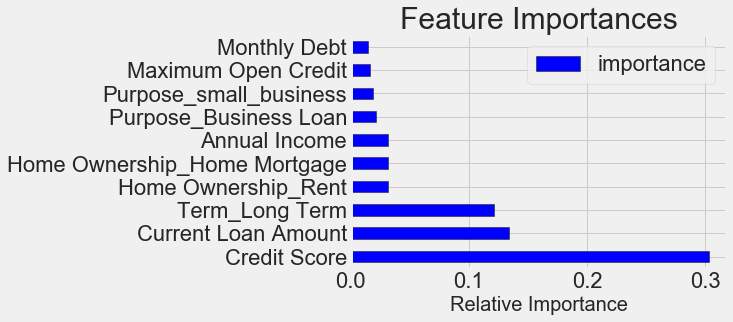

In [140]:
# 시각적인 중요도 비교

figsize=(12, 10)
plt.style.use('fivethirtyeight')

# 수평 바 차트를 통한 상위 10개의 중요도 비교
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances', size = 30);

In [157]:
# 중요한 변수들만 사용하여 로지스틱 회귀분석을 구현

# 상위 10개의 중요도만을 출력
most_important_features = feature_results['feature'][:10]

# 각각의 변수 이름과 일치하는 인덱스를 찾아 저장
indices = [list(features.columns).index(x) for x in most_important_features]

# 중요한 변수들만 이용하여 데이터셋 변경
X_train_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_train_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (79835, 10)
Most important testing  features shape:  (19959, 10)


In [69]:
logr = LogisticRegression()

# 로지스틱 회귀분석 데이터 학습 및 예측
logr.fit(X_train, y_train)
logr_full_pred = logr.predict(X_test)

# 중요도에 해당하는 변수들만 분석
logr.fit(X_train_reduced, y_train)
logr_reduced_pred = logr.predict(X_test_reduced)

# Display results
print('Logistic Regression Full Results: MAE =    %0.4f.' % mae(y_test, logr_full_pred))
print('Logistic Regression Reduced Results: MAE = %0.4f.' % mae(y_test, logr_reduced_pred))

Logistic Regression Full Results: MAE =    0.1834.
Logistic Regression Reduced Results: MAE = 0.1830.


In [71]:
# 중요도 높은 변수만 사용할 때 선형 회귀 결과의 오차값이 더 줄어 들었다.

In [72]:
# 그래디언트 부스트알고리즘에도 중요도가 높은 변수만을 사용
model_reduced = XGBClassifier(loss='ls', max_depth=5, max_features='auto',
                                  min_samples_leaf=6, min_samples_split=2, 
                                  n_estimators=450, random_state=42)

# 데이터 학습
model_reduced.fit(X_train_reduced, y_train)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

# 결과 값이 기존의 것보다 안좋기 때문에 최종모델은 이전것으로 유지

Gradient Boosted Reduced Results: MAE = 0.1817


## Lime 사용으로 모델의 의사결정 과정 확인

In [82]:
# 잔차 확인
residuals = abs(model_reduced_pred - y_test)
    
# 최상, 최악의 잔차 추출
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [76]:
# 예측을 설명하기 위한 LIME 사용
import lime 
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train_reduced, 
                                                   mode = 'classification',
                                                   training_labels = y_train,
                                                   feature_names = list(most_important_features))

Prediction: 1.0000
Actual Value: 0.0000


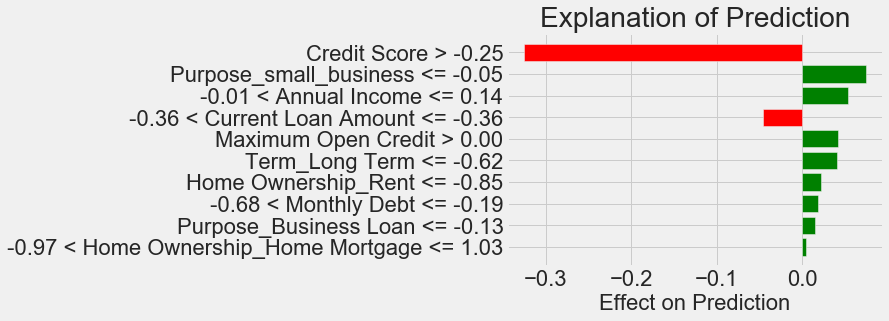

In [86]:
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# 최악의 잔차에 대한 설명
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict_proba,
                                      num_features=10)

# 예측 화면 표시
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

# Credit Score가 높은것이 예측값에 큰영향을 줬음을 확인할수 있다.

Prediction: 1.0000
Actual Value: 1.0000


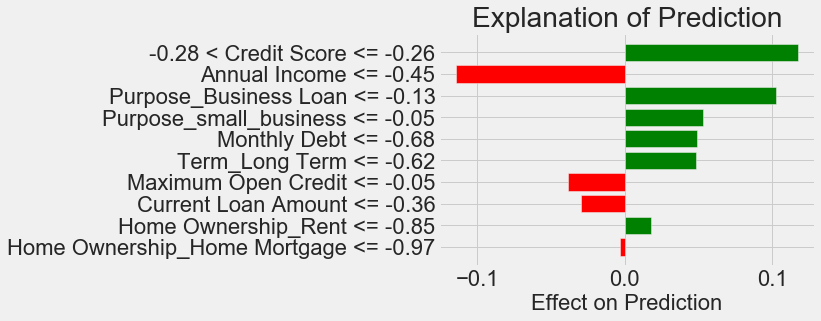

In [85]:
# Now we can go through the same process with a prediction the model got correct.

# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict_proba, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

# The correct value for this case was 1.0 which our gradient boosted model got right on!

# The plot from LIME again shows the contribution to the prediciton of each of feature variables for the example.

# Observing break down plots like these allow us to get an idea of how the model makes a prediction. 
# This is probably most valuable for cases where the model is off by a large amount as we can inspect the errors and perhaps engineer better features or adjust the hyperparameters of the model 
# to improve predictions for next time. The examples where the model is off the most could also be interesting edge cases to look at manually.

In [81]:
## 결과값 테스트 

y_pred = model_reduced.predict(X_test_reduced)

y_pred = list(map(lambda x: 'Fully Paid' if x==1 else 'Charged Off' ,y_pred))
y_pred = np.array(y_pred)
y_pred[:5]

array(['Fully Paid', 'Fully Paid', 'Fully Paid', 'Charged Off',
       'Fully Paid'], dtype='<U11')

In [36]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
model = XGBClassifier(loss = 'ls', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)

default_model = XGBClassifier

# 7. 테스트 데이터 예측

In [27]:
temp = pd.read_csv("dataset/credit_temp.csv")
temp

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
test = pd.read_csv('dataset/credit_test.csv')
test

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# 데이터 더미함수화
def callData(data):
    del data["Loan ID"]
    del data["Customer ID"]
    del data["Months since last delinquent"]
    data = data.dropna()
    # 범주형 데이터 확인
    categorical_subset = data[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

    # one hot encoding(더미함수 사용)
    categorical_subset = pd.get_dummies(categorical_subset)

    data.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
    data = pd.concat([data, categorical_subset], axis = 1)
    data = pd.concat([temp,data])
    data = data.fillna(0)
    data = data[1:]
    return data


def scailData(data):
    
    data = sc.fit_transform(data)
    
    return data

In [30]:
# 칼럼데이터 가져오기
#temp = pd.read_csv("dataset/credit_temp.csv")
# 테스트 데이터 불러오기
#test.head()
test = callData(test)
test

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,611314.0,747.0,2074116.0,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,266662.0,734.0,1919190.0,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,153494.0,709.0,871112.0,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,176242.0,727.0,780083.0,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,321992.0,744.0,1761148.0,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,442596.0,739.0,1528968.0,19494.38,16.7,11.0,0.0,419235.0,656876.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9995,157806.0,731.0,1514376.0,4795.41,12.5,9.0,0.0,87058.0,234410.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9996,132550.0,718.0,763192.0,12401.87,9.9,8.0,0.0,74309.0,329692.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9998,99999999.0,721.0,972097.0,12232.20,16.8,8.0,1.0,184984.0,240658.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
test.isnull().sum()

Current Loan Amount               0
Credit Score                      0
Annual Income                     0
Monthly Debt                      0
Years of Credit History           0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      0
Tax Liens                         0
Term_Long Term                    0
Term_Short Term                   0
Years in current job_1 year       0
Years in current job_10+ years    0
Years in current job_2 years      0
Years in current job_3 years      0
Years in current job_4 years      0
Years in current job_5 years      0
Years in current job_6 years      0
Years in current job_7 years      0
Years in current job_8 years      0
Years in current job_9 years      0
Years in current job_< 1 year     0
Home Ownership_HaveMortgage       0
Home Ownership_Home Mortgage      0
Home Ownership_Own Home           0
Home Ownership_Rent         

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7658 entries, 0 to 9999
Data columns (total 44 columns):
Current Loan Amount               7658 non-null float64
Credit Score                      7658 non-null float64
Annual Income                     7658 non-null float64
Monthly Debt                      7658 non-null float64
Years of Credit History           7658 non-null float64
Number of Open Accounts           7658 non-null float64
Number of Credit Problems         7658 non-null float64
Current Credit Balance            7658 non-null float64
Maximum Open Credit               7658 non-null float64
Bankruptcies                      7658 non-null float64
Tax Liens                         7658 non-null float64
Term_Long Term                    7658 non-null int64
Term_Short Term                   7658 non-null int64
Years in current job_1 year       7658 non-null int64
Years in current job_10+ years    7658 non-null int64
Years in current job_2 years      7658 non-null int64
Years i

In [33]:
test[27:28]

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
35,468908.0,6470.0,1833842.0,5898.93,14.4,19.0,1.0,183863.0,809490.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [34]:
test_pury = test
test_pury = sc.fit_transform(test_pury)

In [38]:
test_pury

array([[-0.39730937, -0.2247615 ,  0.78549487, ..., -0.05836702,
        -0.0228605 , -0.03233808],
       [-0.40723134, -0.23354045,  0.60823869, ..., -0.05836702,
        -0.0228605 , -0.03233808],
       [-0.41048927, -0.25042306, -0.59090354, ..., -0.05836702,
        -0.0228605 , -0.03233808],
       ...,
       [-0.41109221, -0.24434532, -0.71437854, ..., -0.05836702,
        -0.0228605 , -0.03233808],
       [ 2.46392947, -0.24231941, -0.47536312, ..., -0.05836702,
        -0.0228605 , -0.03233808],
       [ 2.46392947, -0.22408619, -0.35195333, ..., -0.05836702,
        -0.0228605 , -0.03233808]])

In [39]:
#y_pred = final_model.predict(test_pury[27:28])
y_pred = default_model.predict(test_pury[27:28])
# y_pred = list(map(lambda x: 'Fully Paid' if x==1 else 'Charged Off' ,y_pred))
# y_pred = np.array(y_pred)
# y_pred
#np.where(y_pred==0)
y_pred

TypeError: predict() missing 1 required positional argument: 'data'

# 8. 고객 한명에 대한 데이터 예측해보기

In [228]:
temp = pd.read_csv("dataset/credit_temp.csv")
temp

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [214]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 44 columns):
Current Loan Amount               1 non-null int64
Credit Score                      1 non-null int64
Annual Income                     1 non-null int64
Monthly Debt                      1 non-null int64
Years of Credit History           1 non-null int64
Number of Open Accounts           1 non-null int64
Number of Credit Problems         1 non-null int64
Current Credit Balance            1 non-null int64
Maximum Open Credit               1 non-null int64
Bankruptcies                      1 non-null int64
Tax Liens                         1 non-null int64
Term_Long Term                    1 non-null int64
Term_Short Term                   1 non-null int64
Years in current job_1 year       1 non-null int64
Years in current job_10+ years    1 non-null int64
Years in current job_2 years      1 non-null int64
Years in current job_3 years      1 non-null int64
Years in current job_4 years    

In [232]:
test_new = pd.read_csv('dataset/train_new.csv')
test_new
#test_puri = callData(test_new)

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f8fa11bd-d0d2-4c9f-998e-9f9d866803a7,ab86ebb2-c4f4-47dd-b430-3d6270394f8b,468908,Long Term,6470,1833842,8 years,Rent,other,5898.93,14.4,NaN,19,1,183863,809490,1,0


In [215]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
Current Loan Amount          1 non-null int64
Term                         1 non-null object
Credit Score                 1 non-null int64
Annual Income                1 non-null int64
Years in current job         1 non-null object
Home Ownership               1 non-null object
Purpose                      1 non-null object
Monthly Debt                 1 non-null float64
Years of Credit History      1 non-null float64
Number of Open Accounts      1 non-null int64
Number of Credit Problems    1 non-null int64
Current Credit Balance       1 non-null int64
Maximum Open Credit          1 non-null int64
Bankruptcies                 1 non-null int64
Tax Liens                    1 non-null int64
dtypes: float64(2), int64(9), object(4)
memory usage: 248.0+ bytes


In [233]:
def callDataone(data):
    del data["Loan ID"]
    del data["Customer ID"]
    del data["Months since last delinquent"]
    data = data.dropna()
    # 범주형 데이터 확인
    categorical_subset = data[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

    # one hot encoding(더미함수 사용)
    categorical_subset = pd.get_dummies(categorical_subset)

    data.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
    data = pd.concat([data, categorical_subset], axis = 1)
    data = pd.concat([temp,data],sort=False)
    data = data.fillna(0)
    data = data[1:]
    return data



In [234]:
test_new_one = callDataone(test_new)
test_new_one

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,468908,6470,1833842,5898.93,14.4,19,1,183863,809490,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0


In [193]:
test[27:28]

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
35,468908.0,6470.0,1833842.0,5898.93,14.4,19.0,1.0,183863.0,809490.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [235]:
test_puri_one = sc.fit_transform(test_new_one)

In [240]:
y_pred = final_model.predict(test_puri[27:28])

# y_pred = list(map(lambda x: 'Fully Paid' if x==1 else 'Charged Off' ,y_pred))
# y_pred = np.array(y_pred)
# y_pred[:]
y_pred

array([], dtype=float64)